# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [2]:
evdata = pd.read_csv(r'electric_vehicle_population_data.csv.zip')

# Cleaning

In [3]:
evdata.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


In [4]:
evdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181458 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181458 non-null  object 
 4   Postal Code                                        181455 non-null  float64
 5   Model Year                                         181458 non-null  int64  
 6   Make                                               181458 non-null  object 
 7   Model                                              181458 non-null  object 
 8   Electric Vehicle Type                              181458 non-null  object

In [5]:
evdata.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [6]:
evdata[evdata['County'].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
91,5YJSA1E21J,NaN,NaN,AE,NaN,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,NaN,220643132,NaN,NaN,NaN
136484,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,NaN,159850029,NaN,NaN,NaN
163689,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,475254825,NaN,NaN,NaN


In [7]:
evdata[evdata['County'].notna()].isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 395
DOL Vehicle ID                                         0
Vehicle Location                                       5
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

In [8]:
evdata = evdata[evdata['County'].notna()]

In [9]:
evdata['Postal Code'] = evdata['Postal Code'].astype(int)
evdata['2020 Census Tract'] = evdata['2020 Census Tract'].astype(int)

In [10]:
evdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181455 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181455 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181455 non-null  object 
 4   Postal Code                                        181455 non-null  int32  
 5   Model Year                                         181455 non-null  int64  
 6   Make                                               181455 non-null  object 
 7   Model                                              181455 non-null  object 
 8   Electric Vehicle Type                              181455 non-null  object 
 9 

In [11]:
#exporting cleaned df
#evdata.to_csv('evcleaned.csv')

# Analysis

In [12]:
evdata.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-2147483648
1,WAUUPBFF2J,Thurston,Olympia,WA,98502,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,-2147483648
2,5YJSA1E22H,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,-2147483648
3,1C4JJXP62M,Thurston,Tenino,WA,98589,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,-2147483648
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,-2147483648


## Market Penetration and Distribution:

### How is the distribution of electric vehicles (EVs) across different counties and cities?

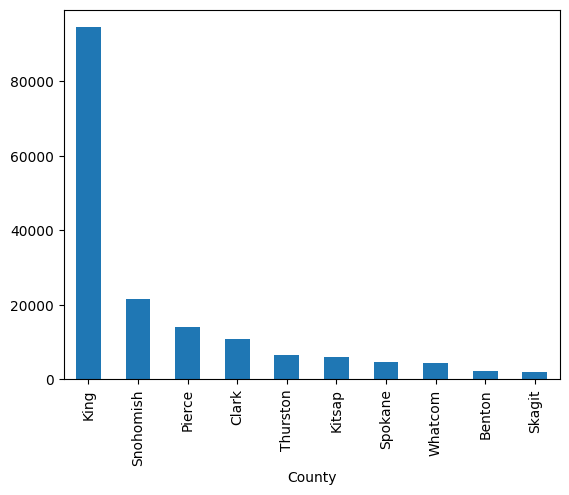

In [13]:
evdata.groupby('County').count()['VIN (1-10)'].sort_values(ascending = False).head(10).plot.bar()
None

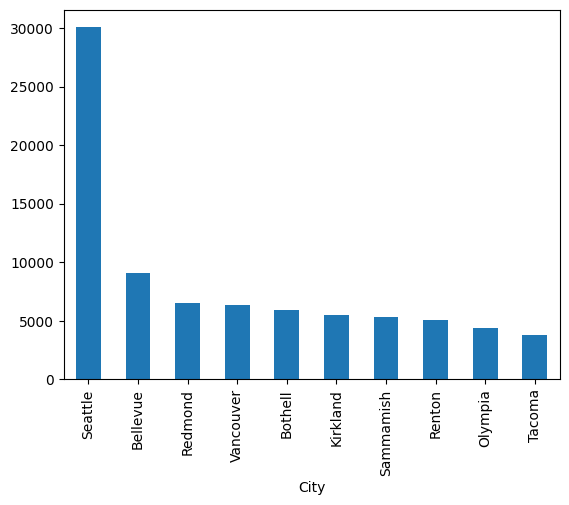

In [14]:
evdata.groupby('City').count()['VIN (1-10)'].sort_values(ascending = False).head(10).plot.bar()
None

### Which electric vehicle types (BEV or PHEV) are most popular?

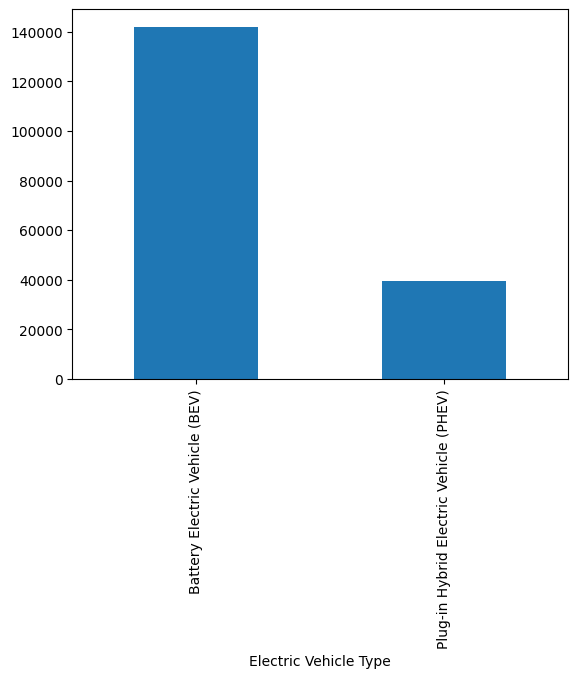

In [15]:
evdata.groupby('Electric Vehicle Type').count()['VIN (1-10)'].plot.bar()
None

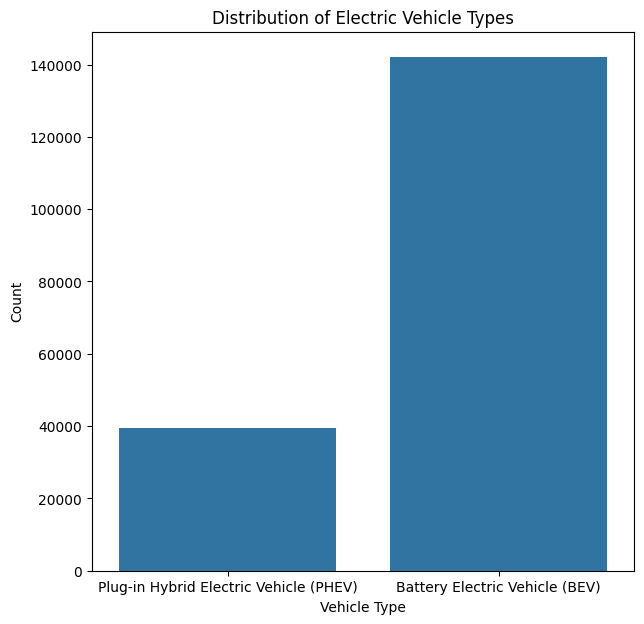

In [16]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Electric Vehicle Type', data=evdata)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

## Market Trends and Preferences

In [17]:
evdata.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-2147483648
1,WAUUPBFF2J,Thurston,Olympia,WA,98502,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,-2147483648
2,5YJSA1E22H,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,-2147483648


### What are the most popular makes and models of EVs?

In [18]:
#evdata.groupby('Make').count()['VIN (1-10)'].sort_values(ascending = False).head(5)
evdata['Make'].value_counts().head(10)

Make
TESLA         80816
NISSAN        14037
CHEVROLET     13864
FORD           9527
BMW            7680
KIA            7642
TOYOTA         6519
VOLKSWAGEN     5163
JEEP           4690
HYUNDAI        4561
Name: count, dtype: int64

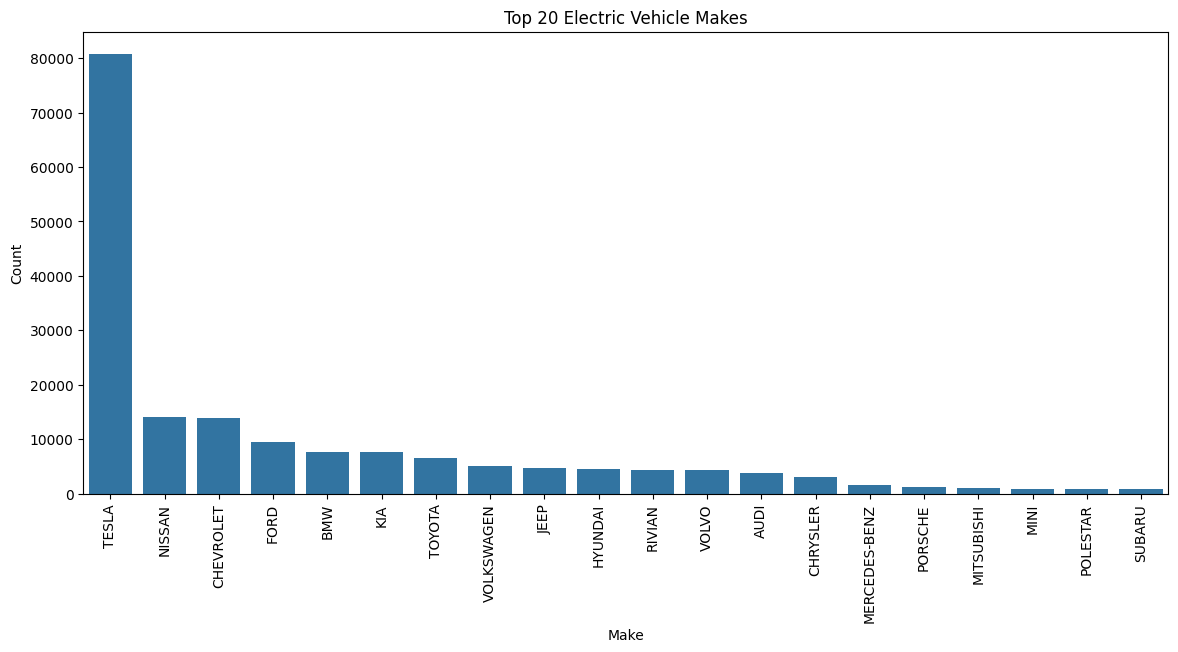

In [19]:
plt.figure(figsize=(14, 6))
make_counts = evdata['Make'].value_counts().nlargest(20)  # Top 20 makes
sns.barplot(x=make_counts.index, y=make_counts.values)
plt.title('Top 20 Electric Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [20]:
#evdata.groupby('Model').count()['VIN (1-10)'].sort_values(ascending = False).head(5)
evdata['Model'].value_counts().head(10)

Model
MODEL Y           37007
MODEL 3           30149
LEAF              13356
MODEL S            7730
BOLT EV            6935
MODEL X            5882
VOLT               4798
ID.4               4091
WRANGLER           3543
MUSTANG MACH-E     3487
Name: count, dtype: int64

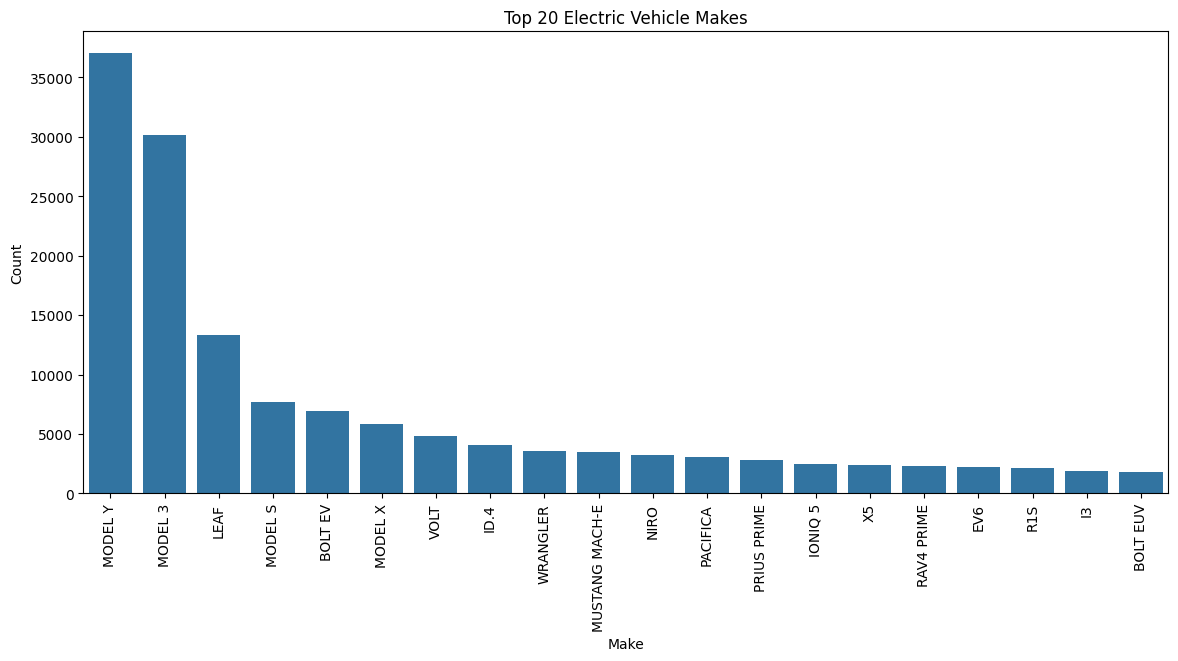

In [21]:
plt.figure(figsize=(14, 6))
make_counts = evdata['Model'].value_counts().nlargest(20)  # Top 20 makes
sns.barplot(x=make_counts.index, y=make_counts.values)
plt.title('Top 20 Electric Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### What is the distribution of EVs through the years?

In [35]:
evdata['Model Year'].value_counts().sort_index(ascending=False).head(15).index

Index([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010],
      dtype='int64', name='Model Year')

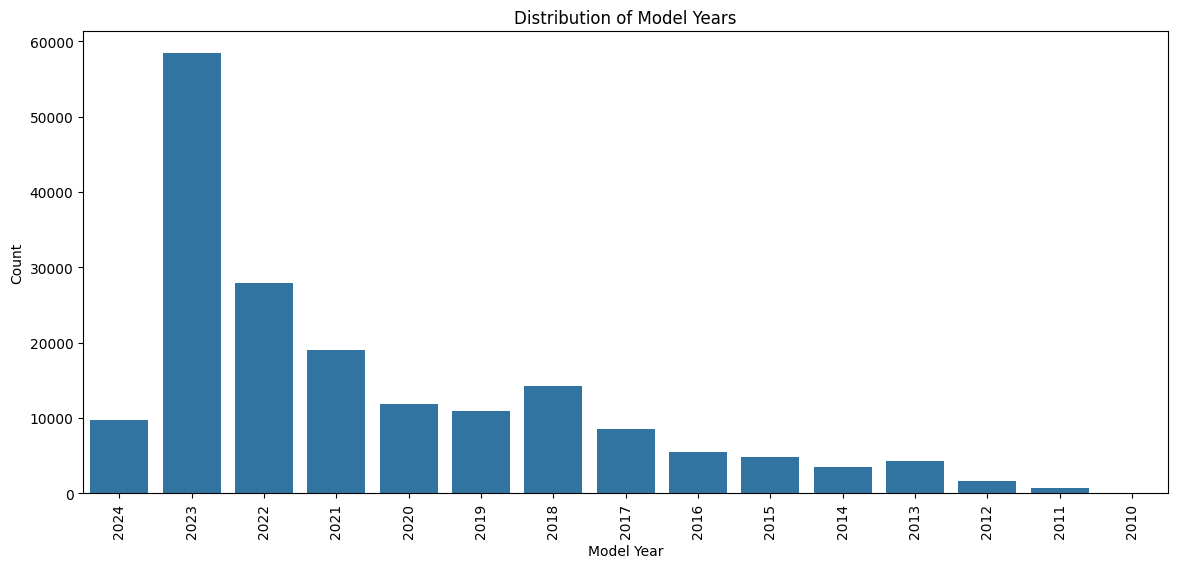

In [36]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Model Year', data=evdata, order=evdata['Model Year'].value_counts().sort_index(ascending=False).head(15).index)
plt.title('Distribution of Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### What is the distribution of electric range of vehicles preffered?

In [41]:
evdata['Electric Vehicle Type'].unique()

array(['Plug-in Hybrid Electric Vehicle (PHEV)',
       'Battery Electric Vehicle (BEV)'], dtype=object)

In [40]:
evdata.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-2147483648
1,WAUUPBFF2J,Thurston,Olympia,WA,98502,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,-2147483648


In [42]:
evdata[evdata['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Electric Range']

2         210
4         308
7         322
10        238
11        208
         ... 
181451      0
181453      0
181455      0
181456    308
181457    208
Name: Electric Range, Length: 141970, dtype: int64

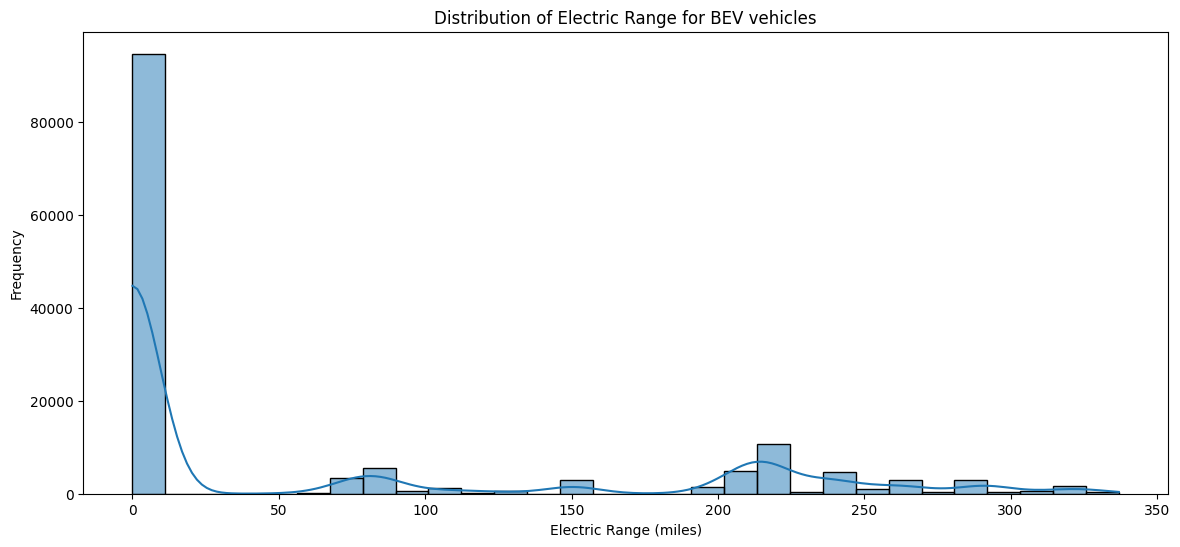

In [44]:
plt.figure(figsize=(14, 6))
sns.histplot(evdata[evdata['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range for BEV vehicles')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

### Market Share between EV models?

In [45]:
evdata['Model'].value_counts().nlargest(10)

Model
MODEL Y           37007
MODEL 3           30149
LEAF              13356
MODEL S            7730
BOLT EV            6935
MODEL X            5882
VOLT               4798
ID.4               4091
WRANGLER           3543
MUSTANG MACH-E     3487
Name: count, dtype: int64

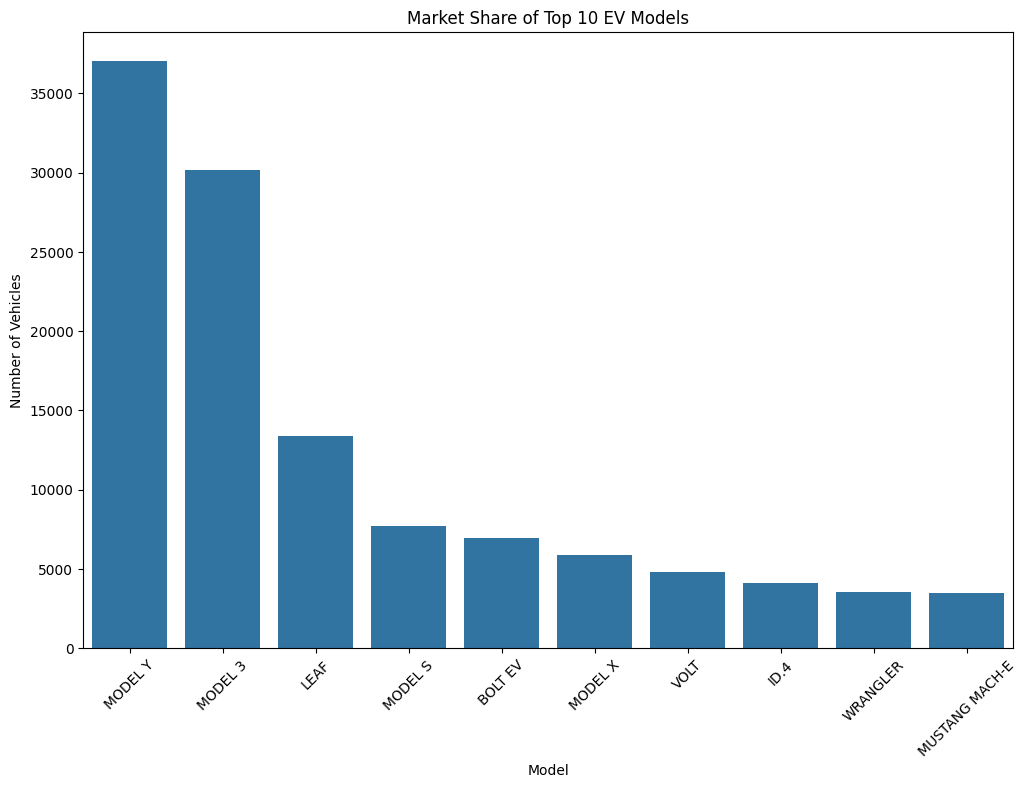

In [24]:
plt.figure(figsize=(12, 8))
top_models = evdata['Model'].value_counts().nlargest(10)
sns.barplot(x=top_models.index, y=top_models.values)
plt.title('Market Share of Top 10 EV Models')
plt.xlabel('Model')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()